In [1]:
import pandas_datareader as web
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import*
import matplotlib.pyplot as plt

In [82]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=a2cfa7652a9db96ab118406b1c053d1eff248d8e3e59fb49c5de591a14f6f49e
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


# Practice

In [231]:
import wget
site_url = 'https://raw.githubusercontent.com/sangngoc27042001/Dummy-Notebook/main/data-csv/MANU_stock_price.csv'
file_name = wget.download(site_url)
df=pd.read_csv(file_name)

In [232]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-08-10,14.05,14.20,14.00,14.00,13.148401,31846200
1,2012-08-13,13.97,15.27,13.96,14.15,13.289278,2061800
2,2012-08-14,14.20,14.48,14.15,14.20,13.336237,204800
3,2012-08-15,14.42,14.88,14.03,14.05,13.195360,563500
4,2012-08-16,14.07,14.08,13.29,13.77,12.932392,1605600


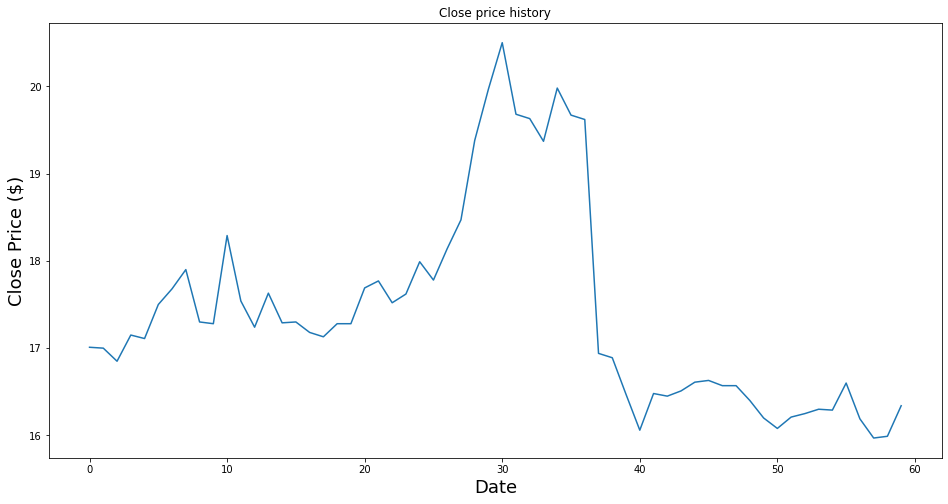

In [233]:
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'].values[len(df)-60:])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price ($)',fontsize=18)
plt.show()

In [234]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data=df.filter(['Close']).values
data=scaler.fit_transform(data)

In [235]:
X=[]
y=[]
for i in range(60,len(data)):
  X.append(data[i-60:i,:])
  y.append(data[i][0])

In [236]:
X=np.array(X)
y=np.array(y)

In [237]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(60,1)))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(32,return_sequences=False))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))

In [238]:
model.compile(
    optimizer='adam',
    loss='mse'
)

In [239]:
model.fit(X,y,batch_size=16, epochs=20)

Epoch 1/20
142/142 [==============================] - 10s 43ms/step - loss: 0.0103
Epoch 2/20
142/142 [==============================] - 6s 43ms/step - loss: 0.0030
Epoch 3/20
142/142 [==============================] - 6s 43ms/step - loss: 0.0024
Epoch 4/20
142/142 [==============================] - 6s 43ms/step - loss: 0.0019
Epoch 5/20
142/142 [==============================] - 6s 43ms/step - loss: 0.0015
Epoch 6/20
142/142 [==============================] - 6s 43ms/step - loss: 0.0013
Epoch 7/20
142/142 [==============================] - 6s 43ms/step - loss: 0.0012
Epoch 8/20
142/142 [==============================] - 6s 43ms/step - loss: 0.0011
Epoch 9/20
142/142 [==============================] - 6s 43ms/step - loss: 8.8106e-04
Epoch 10/20
142/142 [==============================] - 6s 43ms/step - loss: 8.6660e-04
Epoch 11/20
142/142 [==============================] - 6s 43ms/step - loss: 7.7127e-04
Epoch 12/20
142/142 [==============================] - 6s 43ms/step - loss: 6.5872e

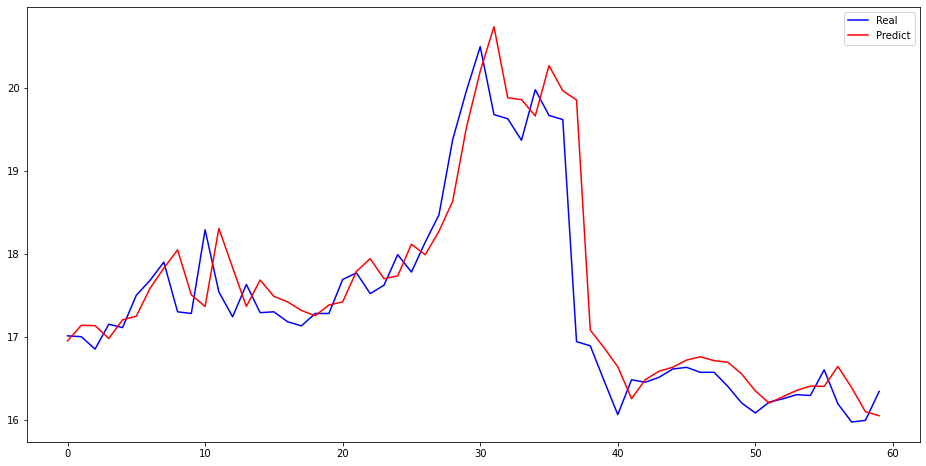

In [241]:
y_test=y[len(y)-60:]
y_predict=model.predict(X[len(y)-60:])

y_test=scaler.inverse_transform(y_test.reshape(-1, 1))
y_predict=scaler.inverse_transform(y_predict.reshape(-1,1))

plt.figure(figsize=(16,8))
plt.plot(y_test, color='blue', label='Real')
plt.plot(y_predict, color='red', label='Predict')
plt.legend()
plt.show()

# Dealing with real data

In [122]:
import wget
site_url = 'https://raw.githubusercontent.com/sangngoc27042001/Dummy-Notebook/main/data-csv/HiPower_NL_2018-08_2018-12.csv'
file_name = wget.download(site_url)

In [129]:
df=pd.read_csv(file_name)
df.head(3)

,Timestamp,Temp,Rh,Co2,HumidityDeficity,VentLee,VentWind,LowerCircuit,GrowthCircuit,AssimilationLighting,EnergyCurtain,BlackOutCurtain,ClimateEnergyDemand,Co2ActuationRegulation,WaterSupply,Drain,DrainEc,DrainPh,HeatingTempViP,VentilationTempLeeSideViP,VentilationTempWindSideViP,LeeSideWindowPositionMin,NetPipeMin,CropPipeMin,EnergiedoekViPDoekstand,VerduisteringsdoekViPDoekstand,LightingViPOn,Co2ViP,HumidityDeficitViP,WaterSupplyIntervalTimeViP,IrrigationSupplyTimeViP,WriteToiSii,SpAllowFruits,SpAllowLeaves,SpHeatingTemp,SpVentTemp,SpLeeMinVent,SpNetPipeMinVent,SpCropPipeMinVent,SpEnergyScreen,SpBlackoutScreen,SpLightingOn,SpCo2,SpHumidityDeficit,SpIrrigationInterval,SpIrrigationSupply,ParCumulative,Par,CostLighting,CostCo2,ItemType,OutsideTemp,OutsideRh,Radiation,RadiationSum,WindSpeed,WindDirection,Rain,ParOut,HeatEmission,AbsoluteHumidity,Irrigation,LampHours,Co2Hours
0,8/26/2018 0:25,18.8,81.7,725.0,2.96,0.0,0.0,35.9,0.0,0.0,95.0,0.0,51.9,0.0,54.0,1.9,4.48,6.31,19.0,20.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,400.0,2.2,20.0,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,11.4,88.0,0.0,0.0,0.0,16.0,False,0.0,-30.0,NaN,3.096,0.0,0.0
1,8/26/2018 0:30,18.8,82.0,710.0,2.89,0.0,0.0,36.8,0.0,0.0,95.0,0.0,38.9,0.0,54.0,1.9,4.48,6.32,19.0,20.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,400.0,2.2,20.0,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,11.4,87.7,0.0,0.0,0.0,16.0,False,1.0,-30.0,NaN,3.096,0.0,0.0
2,8/26/2018 0:35,18.9,81.8,713.0,2.92,0.0,0.0,37.2,0.0,0.0,95.0,0.0,38.9,0.0,54.0,1.9,4.50,6.31,19.0,20.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,400.0,2.2,20.0,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,11.5,86.6,0.0,0.0,0.5,16.0,False,0.0,-31.0,NaN,3.096,0.0,0.0


In [186]:
drop_fields=[]
for field in df.isnull().sum().index:
  if df.isnull().sum()[field]>1000:
    print((field,df.isnull().sum()[field]))
    drop_fields.append(field)

In [187]:
df=df.drop(drop_fields,axis=1)

In [ ]:
df.dropna()

In [203]:
X=df.drop(['Timestamp'],axis=1).values
y=df['Co2'].values.reshape(-1,1)

In [204]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X=X_scaler.fit_transform(X)
y=y_scaler.fit_transform(y)

In [205]:
X.shape

(6428, 58)

In [209]:
X_2=[]
y_2=[]
for i in range(100,len(df)):
  X_2.append(X[i-100:i])
  y_2.append(y[i])

In [213]:
X_2=np.array(X_2)
y_2=np.array(y_2).reshape(-1,1)

In [214]:
X_2.shape,y_2.shape

((6328, 100, 58), (6328, 1))

In [215]:
X_2=X_2.astype('float32')
y_2=y_2.astype('float32')

In [216]:
model=Sequential()
model.add(LSTM(256,return_sequences=True,input_shape=(100,58)))
model.add(LSTM(128,return_sequences=True))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))

In [217]:
model.compile(
    optimizer='adam',
    loss='mse'
)

In [218]:
model.fit(X_2,y_2,batch_size=16, epochs=20)

Epoch 1/20
396/396 [==============================] - 40s 88ms/step - loss: 0.0115
Epoch 2/20
396/396 [==============================] - 35s 88ms/step - loss: 0.0048
Epoch 3/20
396/396 [==============================] - 35s 88ms/step - loss: 0.0036
Epoch 4/20
396/396 [==============================] - 35s 88ms/step - loss: 0.0030
Epoch 5/20
396/396 [==============================] - 35s 88ms/step - loss: 0.0029
Epoch 6/20
396/396 [==============================] - 35s 88ms/step - loss: 0.0025
Epoch 7/20
396/396 [==============================] - 35s 88ms/step - loss: 0.0027
Epoch 8/20
396/396 [==============================] - 35s 88ms/step - loss: 0.0025
Epoch 9/20
396/396 [==============================] - 35s 88ms/step - loss: 0.0025
Epoch 10/20
396/396 [==============================] - 35s 88ms/step - loss: 0.0024
Epoch 11/20
396/396 [==============================] - 35s 89ms/step - loss: 0.0024
Epoch 12/20
396/396 [==============================] - 35s 88ms/step - loss: 0.0023
E

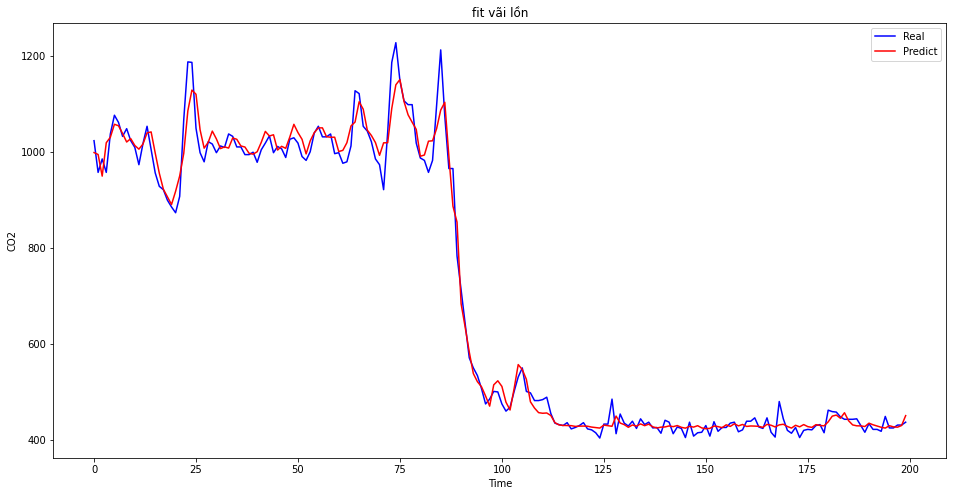

In [223]:
y_test=y_2[len(y_2)-200:]
y_predict=model.predict(X_2[len(X_2)-200:])

y_test=y_scaler.inverse_transform(y_test)
y_predict=y_scaler.inverse_transform(y_predict)

plt.figure(figsize=(16,8))
plt.title("fit vãi lồn")
plt.plot(y_test, color='blue', label='Real')
plt.plot(y_predict, color='red', label='Predict')
plt.xlabel('Time')
plt.ylabel('CO2')
plt.legend()
plt.show()